# Inicialización de R

In [1]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

## Instalación de paquetes

* `palmerpenguins` Contiene las tres especies de pingüinos.
* `tidyverse` Metapaquete de todos los paquetes tidyverse 
* `caret` Contiene la funcion `confusionMatrix`
* `class` Contiene la funcion `knn`

In [2]:
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {install.packages("tidyverse")}
if("palmerpenguins" %in% rownames(installed.packages()) == FALSE) {install.packages("palmerpenguins")}
if("GGally" %in% rownames(installed.packages()) == FALSE) {install.packages("GGally")}
if("caret" %in% rownames(installed.packages()) == FALSE) {install.packages("caret")}
if("class" %in% rownames(installed.packages()) == FALSE) {install.packages("class")}
if("e1071" %in% rownames(installed.packages()) == FALSE) {install.packages("e1071")}
if("gmodels" %in% rownames(installed.packages()) == FALSE) {install.packages("gmodels")}
if("kernlab" %in% rownames(installed.packages()) == FALSE) {install.packages("kernlab")}

# Conjunto de Datos

Los datos de `palmerpenguins` contienen 

* Medidas de tamaño
* Observaciones de nidadas
* Proporciones de isótopos en sangre 

para __tres especies de pingüinos__ observadas en __tres islas__ del archipiélago de Palmer, en la Antártida, durante un __período de estudio de tres años__. 

## Contexto

Estos datos fueron recopilados entre 2007 y 2009 por la Dra. Kristen Gorman con el Programa de Investigación Ecológica a Largo Plazo de la Estación Palmer, parte de la Red de Investigación Ecológica a Largo Plazo de los Estados Unidos.

## Contenido

El conjunto de datos curado `penguins` contiene $344$ observaciones de $8$ variables. Los nombres de estas variables son

    species island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g sex, year

### Lectura y análisis general del contenido




In [3]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
library("palmerpenguins")
# Guardamos datos en un dataframe
data <- penguins

In [5]:
# Miramos cantidad de observaciones y caracteristicas
dim(data)

[1] 344   8

In [6]:
# Nombres de las caracteristicas
names(data)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

In [7]:
# Observacion algunos registros, nombres de variables y tipos
head(data, 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007


#### Variables categóricas

In [8]:
# 1. Obtenemos array de bool indicando si la columna es tipo factor 
is_factor_column <- sapply(data, is.factor)
# 2. Obtenemos los nombres de columnas tipo factor
factor_names <- names(which(is_factor_column == TRUE)) # Omitir ==TRUE
# 3. seleccionamos columnas tipo factor
factor_columns <- select(data, factor_names)
# 4. Onservamos los niveles
sapply(factor_columns, levels)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(factor_names)` instead of `factor_names` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



$species
[1] "Adelie"    "Chinstrap" "Gentoo"   

$island
[1] "Biscoe"    "Dream"     "Torgersen"

$sex
[1] "female" "male"

#### Valores faltantes

Notamos la presencia de valores faltantes en algunas de las observaciones de la clase Gentoo.

In [9]:
# Total de valores faltantes
sum(is.na(penguins))

[1] 19

In [10]:
# Valores faltantes en Adelie
sum(is.na(filter(penguins, species == "Adelie")))
# Valores faltantes en Gentoo
sum(is.na(filter(penguins, species == "Gentoo")))
# Valores faltantes en Chinstrap
sum(is.na(filter(penguins, species == "Chinstrap")))

[1] 10

[1] 9

[1] 0

### Elección de subconjunto

Tomamos el subconjunto compuesto por los pingüinos cuya especie es __Chinstrap__ o __Gento__, y después tratamos con valores faltantes.

In [11]:
data <- filter(penguins, species == "Chinstrap" | species == "Gentoo")

Se tienen $192$ Observaciones.
* $68$ son de especie Chinstrap 
* $124$ son de especie Gentoo

In [12]:
N <- nrow(data)
N

[1] 192

In [13]:
sum(data$species == "Chinstrap")
sum(data$species == "Gentoo")

[1] 68

[1] 124

Con un total de $8$ Características.

In [14]:
d <- ncol(data)
d

[1] 8

#### Valores faltantes

Encontramos la posicion de los valores faltantes. Notemos que sólo 5 registros en nuestro subconjunto de datos presentan valores faltantes. Podemos elegir omitirlos o procesarlos de alguna otra forma.

In [15]:
as.table(which(is.na(data), arr.ind = TRUE))

  row col
A 120   3
B 120   4
C 120   5
D 120   6
E  27   7
F  67   7
G 105   7
H 117   7
I 120   7

In [16]:
data[!complete.cases(data),]

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,44.5,14.3,216,4100,NA,2007
Gentoo,Biscoe,46.2,14.4,214,4650,NA,2008
Gentoo,Biscoe,47.3,13.8,216,4725,NA,2009
Gentoo,Biscoe,44.5,15.7,217,4875,NA,2009
Gentoo,Biscoe,NA,NA,NA,NA,NA,2009


In [17]:
# Omitimos registros con valores faltantes
data <- data[-120,]
#data <- na.omit(data) 
data[!complete.cases(data),]
# Actualizamos la cantidad de datos
N <- N - 1

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,44.5,14.3,216,4100,NA,2007
Gentoo,Biscoe,46.2,14.4,214,4650,NA,2008
Gentoo,Biscoe,47.3,13.8,216,4725,NA,2009
Gentoo,Biscoe,44.5,15.7,217,4875,NA,2009


### Etiquetas

In [18]:
# 1. Removemos el nivel Adelie que no se usa
data$species <- droplevels(data$species)
levels(data$species)

[1] "Chinstrap" "Gentoo"

### Proporcion de clases

La proporción de las clases es

* __Chinstrap__ $$\frac{68}{192} = \frac{17}{48} = 0.354166667$$
* __Gentoo__ $$\frac{124}{192} = \frac{31}{192} = 0.645833333$$

In [19]:
round(prop.table(table(data$species)) * 100, 1)


Chinstrap    Gentoo 
     35.6      64.4 

## División en conjuntos de entrenamiento y prueba


In [20]:
# 1. Agregamos semilla para poder reproducir la misma particion
set.seed(123)
# 2. Dividimos en conjuntos disjuntos de 75% y 25% del total
sample_proportion <- 0.75
# 3. Creamos un ID por fila para hacer la division estratificada del conjunto
data <- data %>% mutate(id = row_number())
# 4. Dividimos en conjuntos de entrenamiento y prueba
train <- data %>% sample_frac(sample_proportion)
test  <- anti_join(data, train, by = 'id')
# 5. Eliminamos la columna auxiliar
train <- select(train, -id)
test <- select(test, -id)
data <- select(data, -id)

In [21]:
# Guardamos la cantidad de registros en cada subconjunto
N_train <- nrow(train)
N_test <- nrow(test)

In [22]:
# Observamos la cantidad de registros de cada clase en cada conjunto
table(data$species)
table(train$species)
table(test$species)


Chinstrap    Gentoo 
       68       123 


Chinstrap    Gentoo 
       52        91 


Chinstrap    Gentoo 
       16        32 

In [23]:
# Verificamos que tengan la misma proporcion de registros por epecie
table(data$species) / N
table(train$species) / N_train
table(test$species) / N_test


Chinstrap    Gentoo 
0.3560209 0.6439791 


Chinstrap    Gentoo 
0.3636364 0.6363636 


Chinstrap    Gentoo 
0.3333333 0.6666667 

In [24]:
# 1. Separamos caracteristicas de etiquetas en el conjunto de entrenamiento
X_train <- select(train, -factor_names)
Y_train <- train$species
# 2. Separamos caracteristicas de etiquetas en el conjunto de prueba
X_test <- select(test, -factor_names)
Y_test <- test$species

In [25]:
# Verificamos tamanios de conjuntos
c(length(Y_train), dim(X_train))
c(length(Y_test), dim(X_test))

[1] 143 143   5

[1] 48 48  5

## Análisis exploratorio de datos

Al proyectar sobre cada pareja de variables numéricas, podemos notar una fuerte dependencia lineal en algunas parejas de variables numéricas.  

También podemos notar que la clase de puntos rojos tiene valores menores en las variables relacionadas con el pico que la clase de pu.ntos negros, mientras que la clase de puntos negros tiene valores menores en las variables de peso y largo de alas.

Además, podemos notar cierta separacion de las clases.

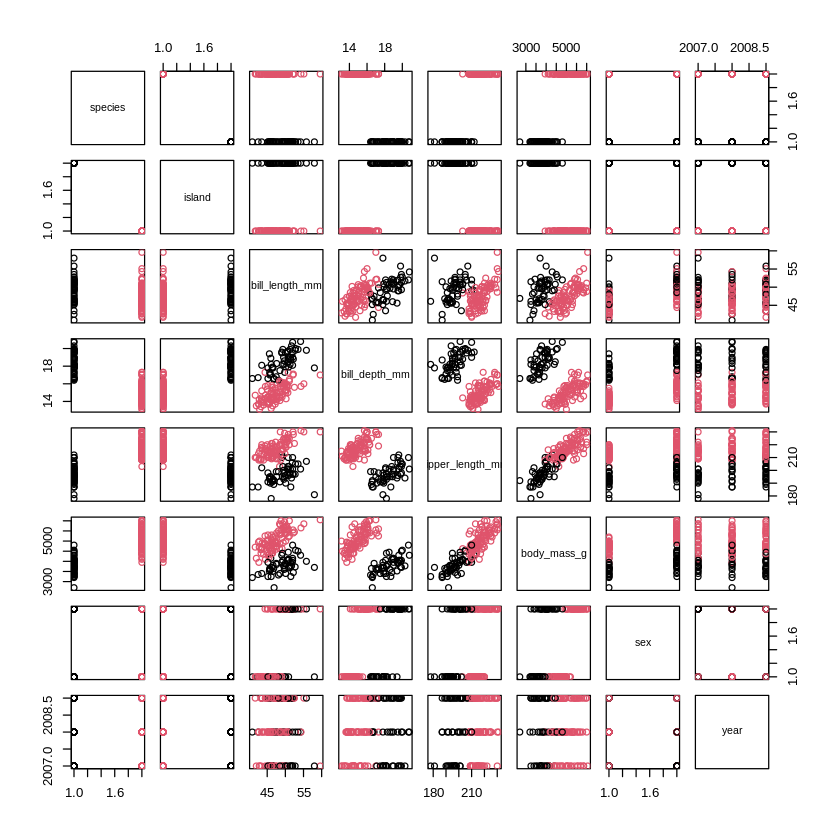

In [26]:
pairs(train, col=train$species)

Notemos que pinguinos pertenecientes a islas diferentes pertenecen a clases diferentes en este conjunto. Puede ser que la variable `island` nos diga directamente la especie de pingüino. 

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



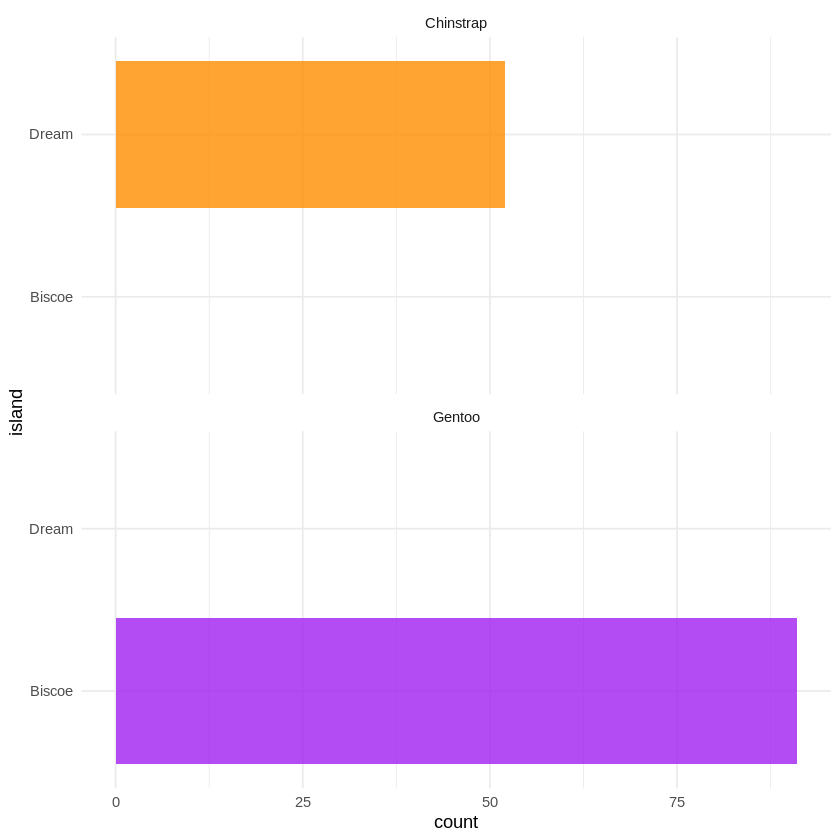

In [27]:
library(GGally)

ggplot(train, aes(x = island, fill = species)) +
  geom_bar(alpha = 0.8) +
  scale_fill_manual(values = c("darkorange","purple"),
                    guide = FALSE) +
  theme_minimal() +
  facet_wrap(~species, ncol = 1) +
  coord_flip()

In [28]:
library("tidyverse")

Al utilizar las componentes principales para una visualización en el plano de los datos, podemos notar una clara separacion (lineal) entre las dos clases.

In [29]:
# Tomamos las variables numericas para visualizacion
numerical_data <- select(data, -factor_names)

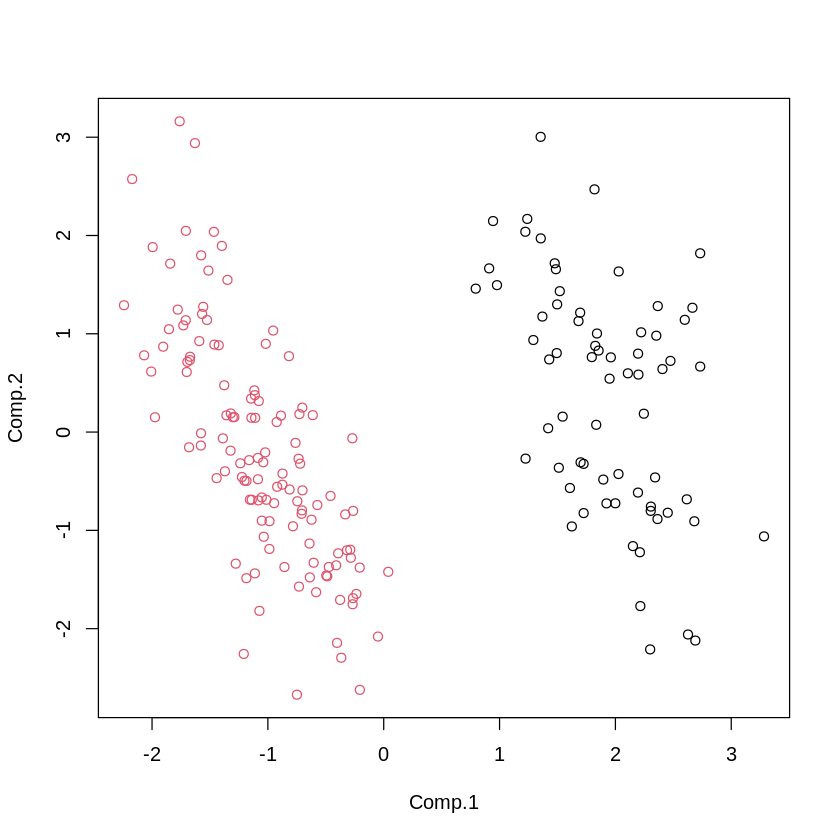

In [30]:
pca <- princomp(numerical_data, cor = TRUE)

plot(pca$scores[,1:2], xlim = range(pca$scores[,1]), ylim = range(pca$scores[,2]), col=data$species)

# SVM

## Elección y entrenamiento de modelo

Usando las visualización de PCA, podemos notar que son linealmente separables (aunque la visualización no corresponde con las escalas originales). Entonces usaremos un kernel lineal y con un parámetro de costo 1.



In [31]:
library(e1071)

s<-svm(
    species~bill_length_mm+bill_depth_mm+ 
    flipper_length_mm+body_mass_g+year, # Usamos las variables numericas
    data=train, 
    kernel="l", # Usamos un kernel linear.
    cost=1, # Asignamos el costo a 1
    scale=TRUE # Normalizamos las escalas de los datos.
)

summary(s)


Call:
svm(formula = species ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g + year, data = train, kernel = "l", cost = 1, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  5

 ( 1 4 )


Number of Classes:  2 

Levels: 
 Chinstrap Gentoo




Notemos que se tienen 5 vectores de soporte: 4 de la clase Gentoo y 1 de la clase Chinstrap. Probando con diferentes parámetros de costo noté que el número de vectores de soporte no cambia, por lo que da la impresión de que estos 4 datos de la clase Gento están sobre un mismo plano.

Hacemos una visualización usando dos variables con las que se notaba cierta separación.

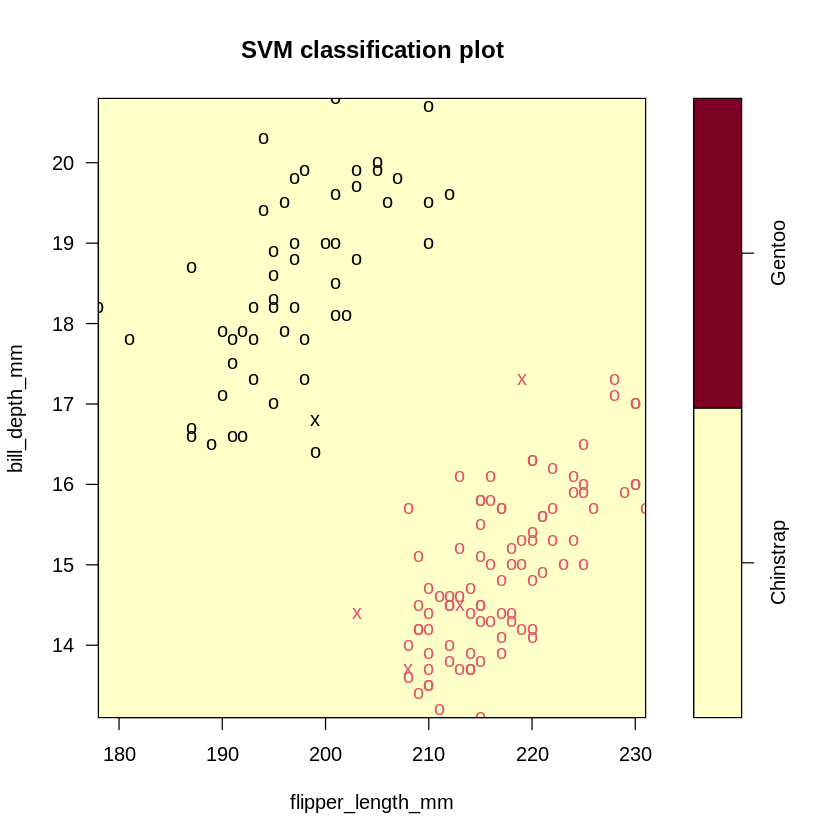

In [32]:
plot(s, train, bill_depth_mm~flipper_length_mm)

In [33]:
library("caret")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Obtenemos un error de predicción ($1 - Accuracy$) de 0 en el conjunto de entrenamiento, lo cual parece razonable debido a las visualizaciones previas.

In [34]:
matrix <- confusionMatrix(Y_train, predict(s))

matrix$overall["Accuracy"]
matrix$overall
matrix$table

Accuracy 
       1

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  1.000000e+00   1.000000e+00   9.745335e-01   1.000000e+00   6.363636e-01 
AccuracyPValue  McnemarPValue 
  8.508750e-29            NaN

           Reference
Prediction  Chinstrap Gentoo
  Chinstrap        52      0
  Gentoo            0     91

## Evaluación del modelo

Ahora usamos el conjunto de prueba para estimar el error. Observemos que se logra un error de 0, por lo que tenemos un buen clasificador.

In [35]:
matrix <- confusionMatrix(Y_test, predict(s, newdata=X_test))

matrix$overall["Accuracy"]
matrix$overall
matrix$table

Accuracy 
       1

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  1.000000e+00   1.000000e+00   9.260272e-01   1.000000e+00   6.666667e-01 
AccuracyPValue  McnemarPValue 
  3.528739e-09            NaN

           Reference
Prediction  Chinstrap Gentoo
  Chinstrap        16      0
  Gentoo            0     32

# $K-$NN


## Entrenamiento de modelo

Ahora nos disponemos a clasificar nuestras observaciones con un algoritmo $K-NN$.


In [36]:
library(class) # Para funcion knn
library(caret) # Para funcion confusionMAtrix
library(gmodels)

* Hacemos uso de la funcion `knn` del paquete `class` y calculamos el error haciendo uso de la funcion `confusionMatrix` la cual calcula, entre otros objetos, la precision ("Accuracy") de un clasificador, esto es, la proporcion de observaciones bien clasificadas, y por lo tanto el error que queremos calcular es $$1 - Accuracy$$ Por lo que iteramos sobre un conjunto de posibles $k$ y nos quedamos con el que obtenga un valor $1 - Accuracy$ mínimo.
* Debemos definir un conjunto de candidatos a $k$, para este caso decidimos elegir un número cercano al tamaño del conjunto de la clase con menos registros.

In [37]:
# 1. Definimos inicialmente k = 1 como el optimo, con un error de 100.0%
k_optim <- 1
error_optim <- 1.0
# 2. Definimos el rango en el que se encuentran las k's candidatas
k_max <- 51
# 3. Inicializamos una lista donde guardamos error para cada k candidata
error_k <- c()
# 4. Construimos clasificadores y guardamos la k optima
for(k in 1:k_max){
    # Entrenamos y obtenemos predicion para el conjunto de prueba
    Y_predicted <- knn(X_train, X_test, cl = Y_train, k = k)
    # Obtenemos matriz de confusion y actualizamos la k optima minimizando error
    matrix <- confusionMatrix(data = Y_predicted, reference = Y_test)
    if( error_optim >  1.0 - matrix$overall["Accuracy"] ){
        error_optim <- 1.0 - matrix$overall["Accuracy"]
        k_optim <- k
    }
    error_k <- c(error_k, 1.0 - matrix$overall["Accuracy"])
}
# 5. Imprimimmos k optima con precision en el conjunto de prueba
print(c(k_optim, as.numeric(error_optim)))

[1] 5 0


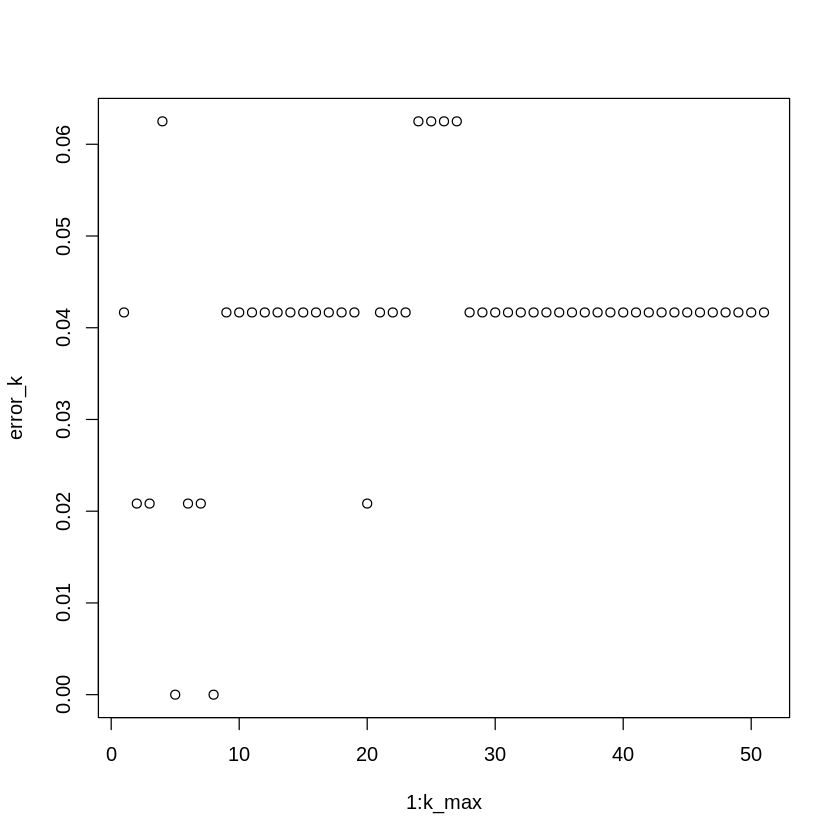

In [38]:
plot(1:k_max, error_k)

Tomamos el $k$ que minimiza el error, en este caso utilizamos $k = 5$. 

## Evaluación del modelo

Como vimos en el entrenamiento, nuestro clasificador basado en $K-NN$ para una $k = 1$ obtiene un error sobre el conjunto de prueba de $0.0$.

In [39]:
Y_predicted <- knn(X_train, X_test, cl = Y_train, k = k_optim)
matrix <- confusionMatrix(data = Y_predicted, reference = Y_test)

matrix$overall["Accuracy"]

Accuracy 
       1

In [40]:
matrix$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  1.000000e+00   1.000000e+00   9.260272e-01   1.000000e+00   6.666667e-01 
AccuracyPValue  McnemarPValue 
  3.528739e-09            NaN

In [41]:
matrix$table

           Reference
Prediction  Chinstrap Gentoo
  Chinstrap        16      0
  Gentoo            0     32

## Complejidad de clasificador

En clase vimos que $$ \frac{N_{\text{train}}}{k} $$ refleja la complejidad de un clasificador $K-NN$. Notemos que para nuestro clasificador este valor es $$\frac{N_{\text{train}}}{k} = \frac{143}{1} = 143$$

In [42]:
N_train / k_optim

[1] 28.6

# LDA

Denotamos por $n_1$ la cantidad de elementos de la clase 1 en la muestra y por $n_2$ la cantidad de elementos de la clase 2. Buscamos una funcion lineal que 

* Separe lo más posible los centroides de la clase.
* Minimice la varianza de las clases proyectas. 

In [43]:
# 1. Separacion de clases
class_1 <- filter(select(train, -c(island, sex)), species == "Chinstrap")
class_2 <- filter(select(train, -c(island, sex)), species == "Gentoo")
overall_class <- select(train, -c(species, island, sex))
# 2. Guardamos la cantidad de datos de cada clase para calculos posteriores
n_1 <- nrow(class_1)
n_2 <- nrow(class_2)

## Centroides de clases

* Observamos los centroides (medias muestrales) de cada clase y los guardamos para su uso posterior. 
* También construimos la media muestral general.

In [44]:
mean_1 <- colMeans(select(class_1, -species))
mean_2 <- colMeans(select(class_2, -species))

mean_1
mean_2

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
         49.25769          18.47692         196.94231        3800.00000 
             year 
       2008.07692

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
         47.38571          14.94945         216.94505        5054.39560 
             year 
       2008.09890

In [45]:
overall_mean <- (mean_1 + mean_2) * 0.5 # colMeans(overall_class)
overall_mean

pca$center

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
         48.32170          16.71319         206.94368        4427.19780 
             year 
       2008.08791

bill_length_mm     bill_depth_mm flipper_length_mm       body_mass_g 
         47.97801          16.20628         209.58115        4597.90576 
             year 
       2008.03665

Visualizamos las medias sobre las componentes principales. 

* Los puntos rellenos pertenecen a las medias muestrales de cada clase. 
* El triáángulo verde pertenece a la media muestral general.

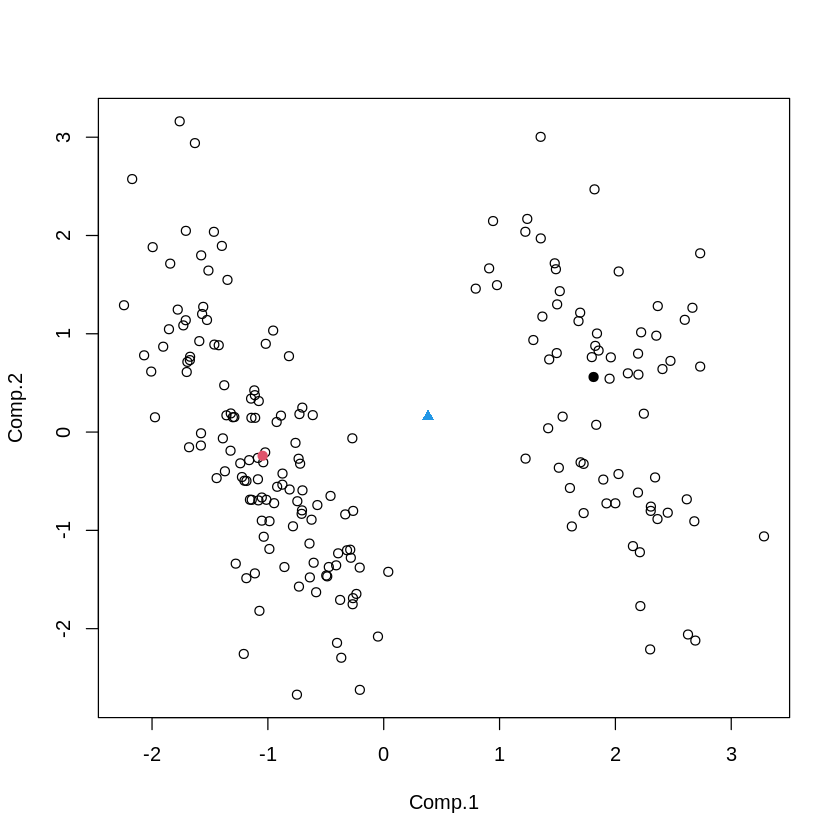

In [46]:
# 1. Para proyectar las medias muestrales, primero las centramos y reescalamos.
proyected_mean_1 <- t(t(pca$loadings) %*% 
    ((mean_1 - pca$center) / pca$scale ))[1:2] #Tomamos primeras dos componentes
proyected_mean_2 <- t(t(pca$loadings) %*% 
    ((mean_2 - pca$center) / pca$scale ))[1:2]#Tomamos primeras dos componentes
# 2. Mismo procedimiento para proyectar la media muestral general.
proyected_overall_mean <- t(t(pca$loadings) %*% 
    ((overall_mean - pca$center) / pca$scale ))[1:2]
# 3. Mostramos las observaciones sobre componentes principales
plot(
    pca$scores[,1:2], xlim = range(pca$scores[,1]), 
    ylim = range(pca$scores[,2])
)
# 4. Mostramos medias muestrales
points( c(proyected_mean_1[1]), c(proyected_mean_1[2]), col=1, pch=19)
points( c(proyected_mean_2[1]), c(proyected_mean_2[2]), col=2, pch=19)
# 5. Mostramos media muestral general
points(c(proyected_overall_mean[1]),c(proyected_overall_mean[2]),col=4,pch=17)

## Matrices de covarianza de clases

Suponemos que las matrices de covarianza son iguales, esto es $$\Sigma_1 = \Sigma_2 = \Sigma$$

In [47]:
S_1 <- cov(select(class_1, -species))
S_2 <- cov(select(class_2, -species))

In [48]:
cov(select(class_1, -species))- cov(select(class_2, -species))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.3854075,0.4088197,-4.6786885,-468.46872,-0.4960842
bill_depth_mm,0.4088197,0.4113348,0.6606665,-48.27532,-0.2903692
flipper_length_mm,-4.6786885,0.6606665,11.7493320,-205.70172,0.8323637
body_mass_g,-468.4687208,-48.2753178,-205.7017166,-85402.84960,-47.7303742
year,-0.4960842,-0.2903692,0.8323637,-47.73037,0.1156216


Podemos notar claramente que las matrices de covarianza son muy distintas. Por otro lado, notemos que las matrices de coeficientes de correlación son muy parecidas, pues los elementos de la matriz diferencia son del orden `1e-1`.

In [49]:
cor(select(class_1, -species)) - cor(select(class_2, -species))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,0.00000000,-0.03597328,-0.32053048,-0.23946214,-0.1961356
bill_depth_mm,-0.03597328,0.00000000,-0.10309915,-0.07258294,-0.3455853
flipper_length_mm,-0.32053048,-0.10309915,0.00000000,-0.01178813,0.1026583
body_mass_g,-0.23946214,-0.07258294,-0.01178813,0.00000000,-0.1332687
year,-0.19613556,-0.34558531,0.10265831,-0.13326865,0.0000000


A pesar de lo anterior, suponemos que las matrices de covarianza son iguales para contruir el clasificador basado en LDA.

Además, __Estimamos la matriz de covarianza__ basándonos en $$W = (n_1 - 1)S_1 + (n_2 - 1)S_2$$ donde $$W / (n_1 + n_ 2 - 2) = S$$ es la estimación de $\Sigma$ (Según el libro JohnsonMVA pag 623 eq. (11-61)  ). En clase, denotamos esta estimación $S$ de la matriz de covarianza como $S_W$.

In [50]:
W <- ((n_1 - 1)*S_1) + ((n_2 - 1) * S_2)

S_W <- W * (1 / (n_1 + n_2 - 2))
S_W

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,10.0703429,2.15158522,11.478026,9.428951e+02,0.19643831
bill_depth_mm,2.1515852,1.13219702,4.516156,3.364023e+02,0.09891669
flipper_length_mm,11.4780259,4.51615618,43.457817,2.051397e+03,1.13989557
body_mass_g,942.8951368,336.40226794,2051.397007,2.129928e+05,0.07403944
year,0.1964383,0.09891669,1.139896,7.403944e-02,0.66526381


## LDA

Ahora que hemos supuesto que la matriz de covarianza es la misma para cada clase, nuestro problema de encontrar la función lineal se convierte en encontrar la dirección de proyeccion $l$ que maximiza 

$$\frac{l^{T} S_{B} l}{l^{T} S_{W} l }$$

donde $S_{W}$ es la esimación de la matriz de covarianza de ambas clases y $$S_{B} = (c_{+} - c_{-})(c_{+} - c_{-})^{T}$$ es el vector que une ambos centroides (estimaciones de las medias de cada clase) $c_{+}$ y $c_{-}$. En el problema 1 de la tarea vimos que, usando la desigualdad Cauchy-Schwartz, encontramos esta dirección que está dada por $$l = S_{W}^{-1}(c_{+} - c_{-})$$ 

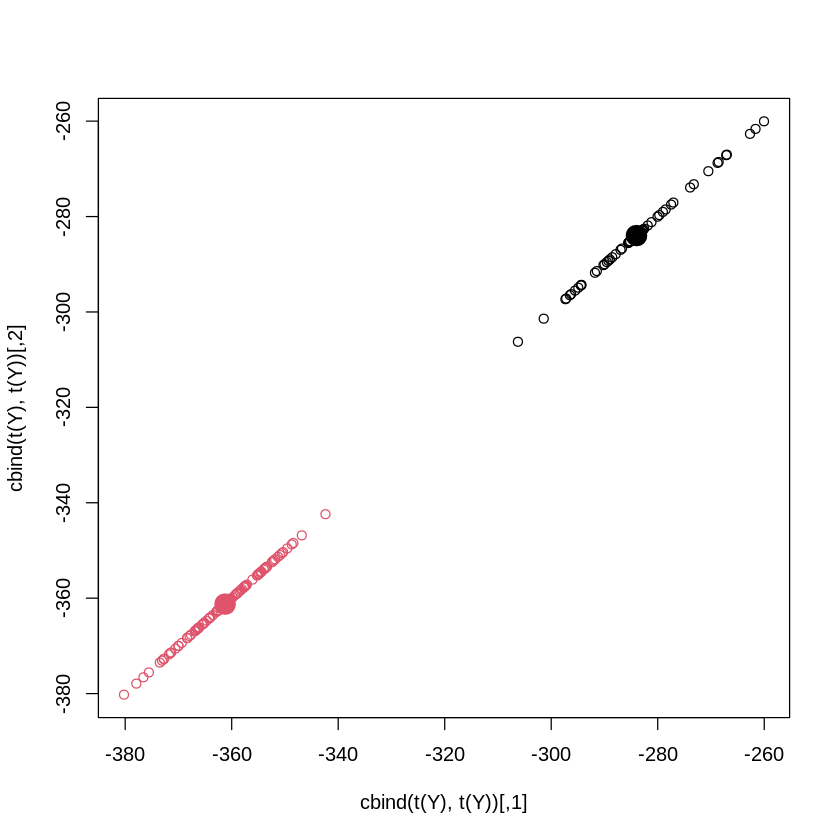

In [51]:
# 1. Encontramos la direccion l usando el resultado anterior
l <- solve(S_W) %*% (mean_1 - mean_2)
# 2. Proyectamos los datos sobre la direccion l
Y <- t(l) %*% t(as.matrix(overall_class))
# 3. Mostramos la proyeccion
plot(cbind(t(Y), t(Y)), xlim = range(Y), ylim = range(Y), col=train$species)
points( 
    c(t(l) %*% as.matrix(mean_1)), 
    c(t(l) %*% as.matrix(mean_1)), 
    col=1, pch=19, lwd = 10
)
points( 
    c(t(l) %*% as.matrix(mean_2)), 
    c(t(l) %*% as.matrix(mean_2)), 
    col=2, pch=19, lwd = 10
)

* En la grafica se muestran los puntos $(l^{T}x_i,l^{T}x_i)$ para una primera visualización. Podemos notar que los datos se separan por completo. 

* Por otro lado, podemos observar las proyecciones de las medias muestrales de cada clase, $$l^{T}c_{+}, l^{T}c_{-}$$ en la gráfica son los puntos de mayor tamaño.

In [52]:
# 1. Observamos las proyecciones de las medias muestrales de cada clase
as.numeric(t(l) %*% as.matrix(mean_1))
as.numeric(t(l) %*% as.matrix(mean_2))
# 2. Calculamos distancias entre medias
as.numeric(t(l) %*% as.matrix(mean_1)) - as.numeric(t(l) %*% as.matrix(mean_2))

[1] -283.9907

[1] -361.2445

[1] 77.25387

* Luego, calculamos la variabilidad por clase, esto es $$l^{T} S_{W} l $$

In [53]:
as.numeric( ( t(as.matrix(l)) %*% as.matrix(S_W)) %*% as.matrix(l) )

[1] 77.25387

## Clasificador

Ahora bien, nos proponemos construir un clasificador. Una opción es usar un punto de corte para obtener una función de la forma $$L(x) = l^{T}x + b_0$$ donde $l = S_W^{-1}(c_{+} - c_{-})$, y hacer la clasificación comparando $L(x)$ con 0. 

Si suponemos gaussianidad, este valor $b_0$ está dado por $$b_0 = -\frac{1}{2}\left[ \mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2 \right] + \log_e(\pi_2 / \pi_1)$$ $$=-\frac{1}{2}\left[ \mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2 \right]$$
donde $\pi_i$ son las probabilidades a priori de cada clase (en este caso ambas son $\frac{1}{2}$), $\mu_1$ y $\mu_2$ son las medias teóricas y $\Sigma$ la matriz de covarianza de ambas clases (Según Izenman pag. 243 eq. (8.13)). 

### Prueba de Gaussianidad
Haciendo uso de la librería `MVN` podemos verificar la gaussianidad (o falta de esta) de los datos.

In [54]:
#library("MVN")
#royston_test <- mvn(data = overall_class, mvnTest = "royston", multivariatePlot = "qq")
#royston_test$multivariateNormality

### Clasificador suponiendo gaussianidad

In [55]:
b_0 <- -0.5 * ( ((t(mean_1) %*% solve(S_W)) %*% mean_1) - ((t(mean_2) %*% solve(S_W)) %*% mean_2) )

In [56]:
# Construimos clasificador lineal de la forma Ind(L(x) > 0)
L <- function(x){
    #print(class(x))
    #print(dim(x))
    if ( t(as.matrix(l)) %*% t(as.matrix(x)) + b_0 > 0 ) {return (1)}
    return (2)
}

In [57]:
library("caret")

In [58]:
# Clasificamos
Y_predicted <- c()
for(i in 1:N_test){
    Y_predicted <- c(Y_predicted, L(X_test[i,]))
}

Y_predicted <- fct_recode(
    as.character(Y_predicted),
    "Chinstrap" = "1",
    "Gentoo" = "2"
)

matrix <- confusionMatrix(data = Y_predicted, reference = Y_test)

matrix$overall["Accuracy"]
matrix$overall
matrix$table

Accuracy 
       1

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  1.000000e+00   1.000000e+00   9.260272e-01   1.000000e+00   6.666667e-01 
AccuracyPValue  McnemarPValue 
  3.528739e-09            NaN

           Reference
Prediction  Chinstrap Gentoo
  Chinstrap        16      0
  Gentoo            0     32

Notamos que nuestro clasificador logra un porcentaje de clasificación correcta de 100%. 

# Conclusiones

A partir de exploración de datos podemos notar ciertas propiedades. En particular nos interesa construir clasificadores, y en la misma exploración se puede observar una clara separacion entre las clases.

* Debido a que hay una clara separación de los datos, se eligió usar un kernel lineal, además, con un parámetro de costo 1. Se hicieron varias pruebas variando el parámetro costo, pero siempre se obtenían los mismos vectores de soporte, por lo que se dejó este parámetro en 1. En el conjunto de prueba se logra un error de 0.

* Al buscar clasificadores basados en $K-NN$, podemos notar que no basta tomar el vecino más cercano para obtener un buen clasificador. Esto es un poco raro para mí pues en la gráfica obtenida con PCA se logra una clara separación. Por otro lado, el clasificador con $k=5$ logra un error de cero en el conjunto de prueba.

* Suponiendo gaussianidad en los datos, podemos contruir un clasificador basado en LDA Gaussiano obteniendo también un error de 0 a peasar de que los datos no tienen distribución gaussiana.

En general, debido a la separación notoria entre las clases se lograron encontrar clasificadores basados en $K-NN$, $LDA$ Gaussiano y $SVM$ con buenos resultados en el conjunto de pruba.


## Referencias

* https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/

* https://allisonhorst.github.io/palmerpenguins/articles/intro.html

* https://www.dicook.org/files/visec2020/slides_tourr#1